In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/flipkart_com-ecommerce_sample_1050.csv")

In [4]:
path = "/content/drive/MyDrive/image"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [5]:
data['product_category_tree'].nunique()

642

In [6]:
data['categorie_1'] = data['product_category_tree'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
data['categorie_1']

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: categorie_1, Length: 1050, dtype: object

In [7]:
data['categorie_2'] = data['product_category_tree'].str.split('>>', expand=True)[1]
data['categorie_2']

0        Curtains & Accessories 
1              Baby Bath & Skin 
2              Baby Bath & Skin 
3                     Bed Linen 
4                     Bed Linen 
                  ...           
1045          Baby & Kids Gifts 
1046          Baby & Kids Gifts 
1047          Baby & Kids Gifts 
1048          Baby & Kids Gifts 
1049          Baby & Kids Gifts 
Name: categorie_2, Length: 1050, dtype: object

In [8]:
data.groupby('categorie_2').count()['uniq_id'].sort_values(ascending=False)

categorie_2
 Wrist Watches                 149
 Laptop Accessories             87
 Infant Wear                    84
 Coffee Mugs                    74
 Showpieces                     71
                              ... 
 Pressure Cookers & Pans         1
 Kripa's Home Furnishing         1
 Men's Grooming                  1
 Beauty Accessories              1
 Consumables & Disposables       1
Name: uniq_id, Length: 63, dtype: int64

In [9]:
from sklearn import preprocessing


data["image_path"] = data['image']
data["label_name"] = data['categorie_1']
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])

In [10]:
data["label_name"].unique()

array(['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor', 'Kitchen',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [11]:
list_labels=["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor", "Home Furnishing", "Kitchen", "Watches"]

In [12]:
import cv2

Baby Care


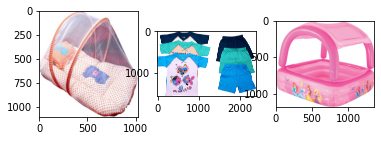

Beauty and Personal Care


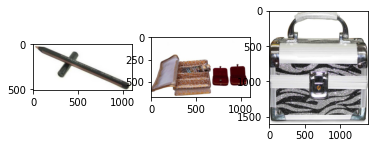

Computers


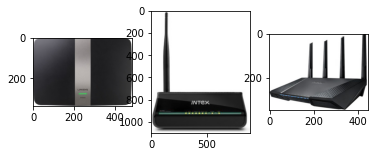

Home Decor


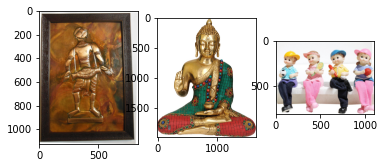

Home Furnishing


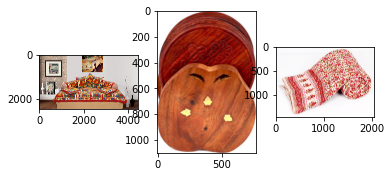

Kitchen


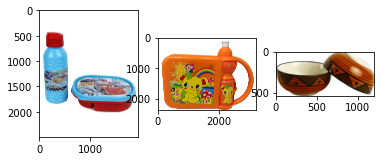

Watches


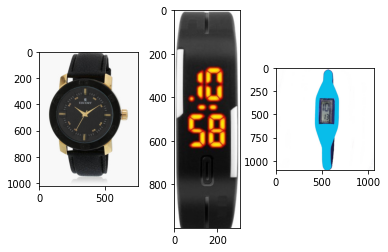

In [13]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [data['image_path'][i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

list_Home_Furnishing=[data['image_path'] for i in range(len(data)) if data["label_name"][i]=="Home Furnishing"]
list_Baby_Care=[data['image_path'] for i in range(len(data)) if data["label_name"][i]=="Baby Care"]
list_Watches=[data['image_path'] for i in range(len(data)) if data["label_name"][i]=="Watches"]
list_Home_Decor_Festive_Needs=[data['image_path'] for i in range(len(data)) if data["label_name"][i]=="Home Decor"]
list_Kitchen_Dining=[data['image_path'] for i in range(len(data)) if data["label_name"][i]=="Kitchen"]
list_Beauty_and_Personal_Care=[data['image_path'] for i in range(len(data)) if data["label_name"][i]=="Beauty and Personal Care"]
list_Computers=[data['image_path'] for i in range(len(data)) if data["label_name"][i]=="Computers"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path +"/"+ list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

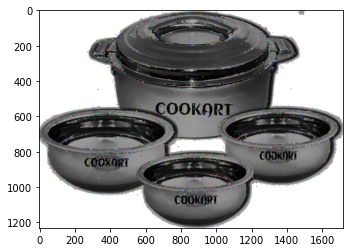

Descripteurs :  (3098, 128)

[[  4.   8.   2. ...   0.   0.   9.]
 [  3.   1.   1. ...   0.   0.   4.]
 [ 19.   2.   1. ...   0.   4.  56.]
 ...
 [ 56. 142.  49. ...   0.   0.   0.]
 [  5.   0.   0. ...   0.   0.   1.]
 [ 25.  10.   0. ...   0.   0.   1.]]


In [14]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+"/"+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

* L'image contient 3098 descripteurs
* Chaque descripteur est un vecteur de longueur 128

In [15]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(200)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+"/"+list_photos[image_num],0) # convert in gray
    smooth = cv2.GaussianBlur(image, (95,95), 0)

    # divide gray by morphology image
    image = cv2.divide(image, smooth, scale=255)
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (210796, 128)
temps de traitement SIFT descriptor :           501.02 secondes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## Création des clusters de descripteurs

In [16]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  459
Création de 459 clusters de descripteurs ...
temps de traitement kmeans :             3.72 secondes


## Création des features des images

In [17]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.31 secondes


## Réductions de dimension

### Réduction de dimension PCA

In [18]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 459)
Dimensions dataset après réduction PCA :  (1050, 381)


### Réduction de dimension T-SNE

In [19]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

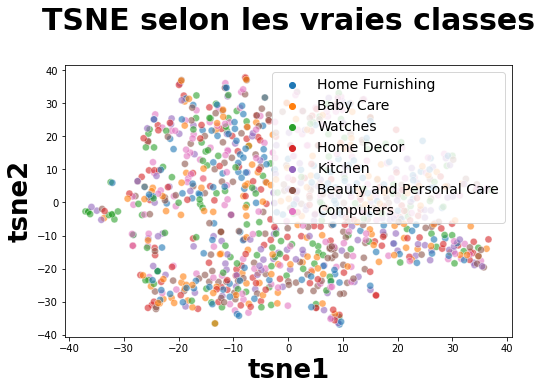

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [21]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

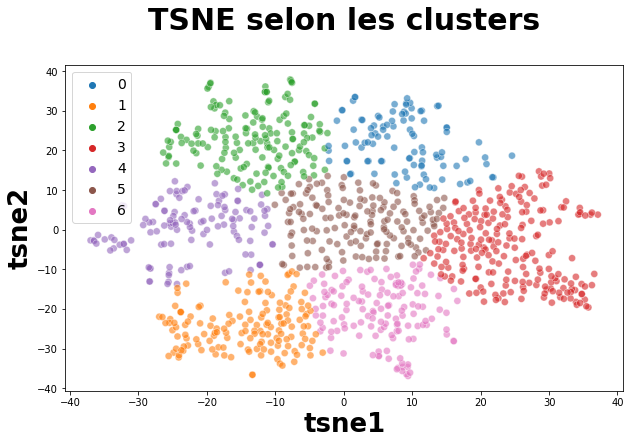

ARI :  0.004686375764704318


In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [23]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    100
1    151
2    160
3    217
4    124
5    157
6    141
Name: class, dtype: int64

In [24]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[13 30 14 35 18 22 18]
 [13 21 24 27 15 19 31]
 [25 15 34 27 20 10 19]
 [11 26 22 31 16 27 17]
 [10 24 27 30 16 30 13]
 [12 17 14 42 14 29 22]
 [16 18 25 25 25 20 21]]


In [25]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6,5,4,3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[18 18 22 35 14 30 13]
 [31 15 19 27 24 21 13]
 [19 20 10 27 34 15 25]
 [17 16 27 31 22 26 11]
 [13 16 30 30 27 24 10]
 [22 14 29 42 14 17 12]
 [21 25 20 25 25 18 16]]

              precision    recall  f1-score   support

           0       0.13      0.12      0.12       150
           1       0.12      0.10      0.11       150
           2       0.06      0.07      0.07       150
           3       0.14      0.21      0.17       150
           4       0.17      0.18      0.17       150
           5       0.11      0.11      0.11       150
           6       0.16      0.11      0.13       150

    accuracy                           0.13      1050
   macro avg       0.13      0.13      0.13      1050
weighted avg       0.13      0.13      0.13      1050



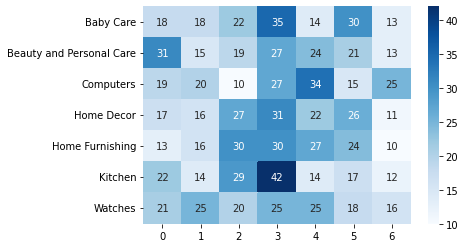

In [26]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# 

```
# Ce texte est au format code
```

Transfer Learning

## ResNet50

In [27]:
from keras import applications
from keras.applications.resnet import ResNet50

# getting the convolutional base of a ResNet50 CNN 
conv_base = ResNet50(weights='imagenet',
                           include_top=False,
                           input_shape=(224,224,3))
for layer in conv_base.layers:
  layer.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten

cnn_model = Sequential()
cnn_model.add(conv_base)
cnn_model.add(Flatten())
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [29]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...


In [31]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123947 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.9 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=b757ae1f39e7618147fb2c71fcc5e075374167db06edac05cde54babcd23aa40
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [32]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 53.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 26.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 71.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 4.6 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-l

In [34]:
import cv2
import os
import numpy as np
import tensorflow as tf

img_CNN = []
for img_file_name in data['image_path']:
  file_path = path + "/" + img_file_name
  img = imread(file_path) 
  img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
  img = tf.keras.applications.resnet50.preprocess_input(img)
  tensor = tf.image.resize(img, [224,224])
  features_img = cnn_model.predict(tensor)
  img_CNN.append(features_img)

1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


1/1 [==============================] - 0s 21ms/step


In [35]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
nsample, nx = np.vstack(img_CNN).shape
img_CNN_new = np.vstack(img_CNN).reshape((nsample,nx))
X_tsne = tsne.fit_transform(img_CNN_new)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 3)


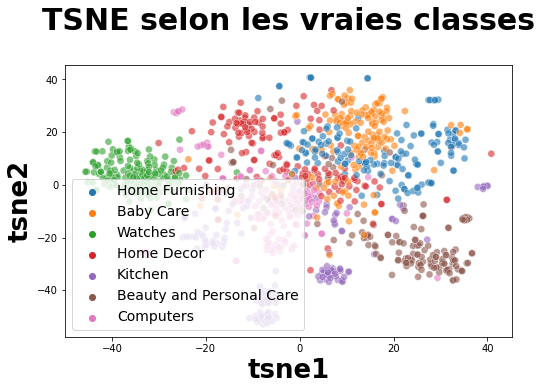

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


In [37]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


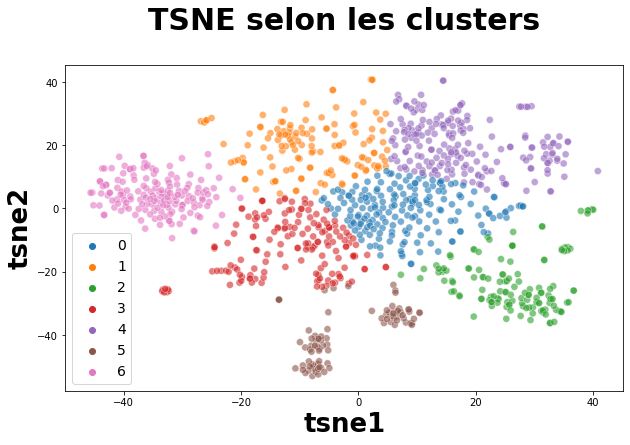

ARI :  0.428221580421397


In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

## VGG

In [39]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

In [40]:
VGG_model = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg')

553467096/553467096 [==============================] - 21s 0us/step


In [41]:
vgg_transfer = Sequential()
vgg_transfer.add(VGG_model)
vgg_transfer.add(Flatten())
vgg_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________


In [42]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array



img_VGG = []
for img_file_name in data['image_path']:
  file_path = path + "/" + img_file_name
  img = imread(file_path)
  img = img_to_array(img)
  img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
  img = preprocess_input(img)
  tensor = tf.image.resize(img, [224,224])
  features_img = vgg_transfer.predict(tensor)
  img_VGG.append(features_img)

1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


1/1 [==============================] - 0s 16ms/step


In [43]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
nsample, nx = np.vstack(img_VGG).shape
img_VGG_new = np.vstack(img_VGG).reshape((nsample,nx))
X_tsne = tsne.fit_transform(img_VGG_new)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 3)


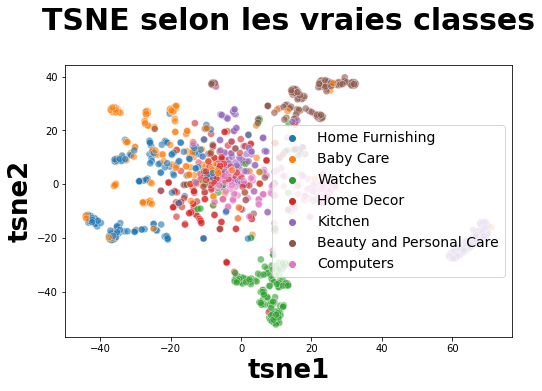

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [45]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


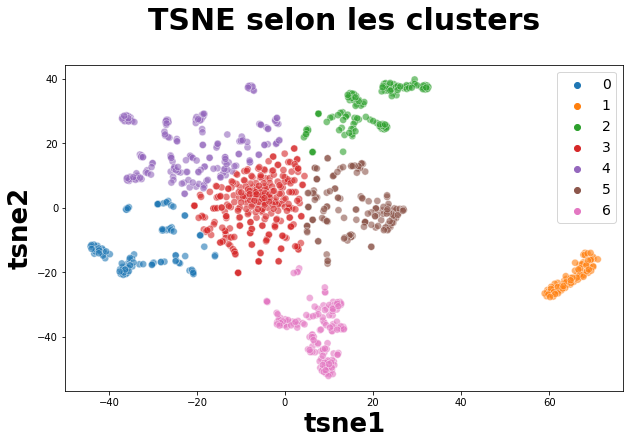

ARI :  0.3529603681267581


In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))